# Red Wine Quality
Coursera Advanced Data Science Capstone Project

## Background
This dataset is provided via Kaggle (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) and is openly and freely available. It contains the chemical test results from different batches of red wine from a portugese vineyard. 

In total, 11 features are reported: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, all numerical and based on physiochemical tests. The target is reported as the quality (ranging between 0-10), based on sensory data. The dataset contains 1599 examples.




In [2]:
# Import data exploration libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
# Import dataset from IBM ObjectStorage as Pandas Dataframe
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ab7ec63426ba4703bfcdc7e2b7592286 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XX',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ab7ec63426ba4703bfcdc7e2b7592286.get_object(Bucket='ibmadvancedcapstone-donotdelete-pr-6kout1ocpnvgg4',Key='winequality-red.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

### 1 - Initial dataframe exploration

Let's check the size of the data, as well as the format of each of the columns

In [5]:
# Check size and get a feeling for data
print("The dataset contains {} rows with {} features each".format(df.shape[0], df.shape[1]))
df.head()

The dataset contains 1599 rows with 12 features each


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Check dataframe datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

As we can see, we have a dataset of almost 1600 entries (12 features each), all with float/integer datatypes.

Next up, check for missing and/or inconsistent values:

In [12]:
# Check for NaN values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2 - Statistical description of numerical features

In [14]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


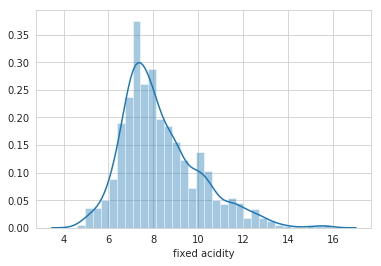

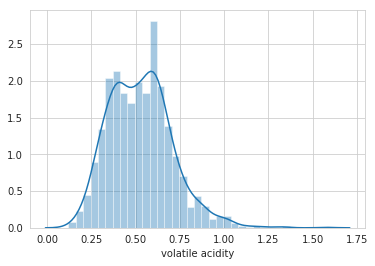

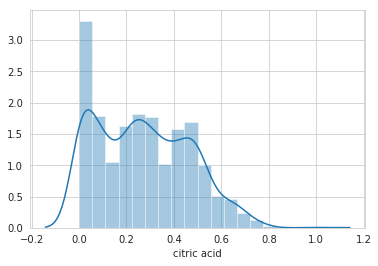

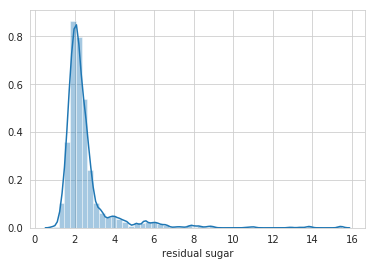

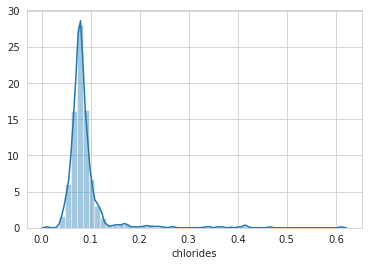

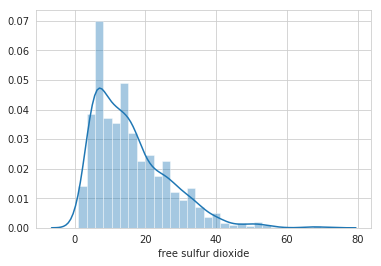

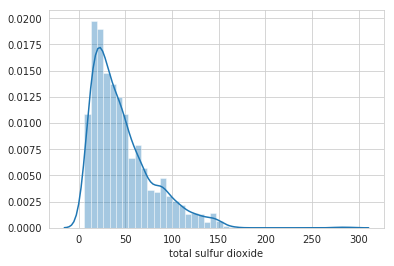

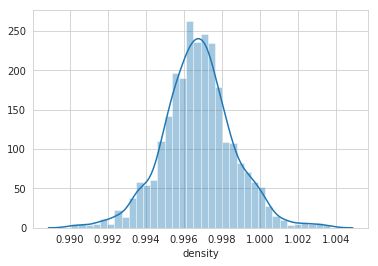

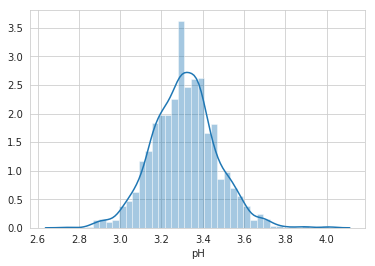

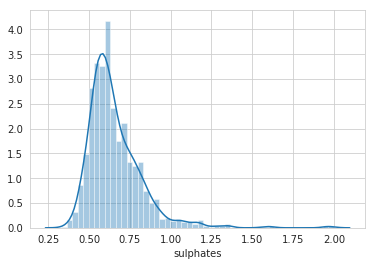

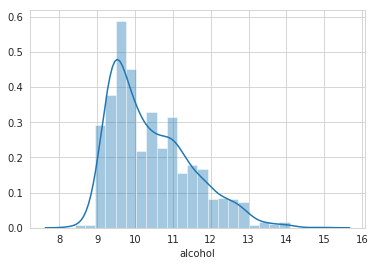

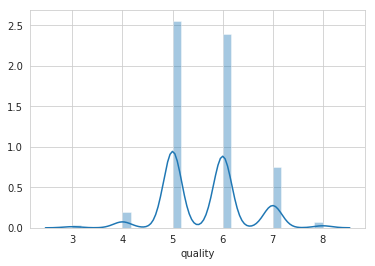

In [33]:
for col in df.columns:
    plt.figure()
    sns.distplot(df[col])

...and noting that the target state (quality) is categorical, we take a closer look

In [29]:
df.groupby("quality").size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

and see that the values ranges between 3-8 (out of 0-10).

### 3 - Outlier detection

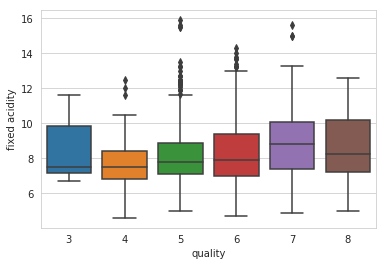

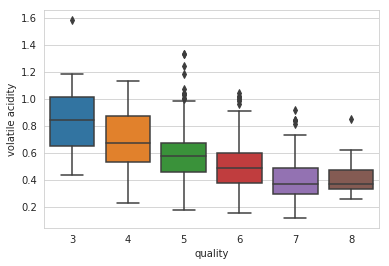

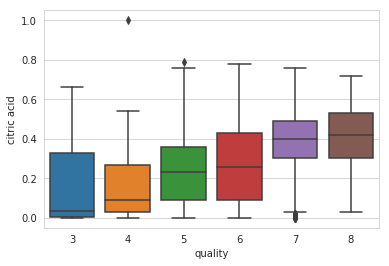

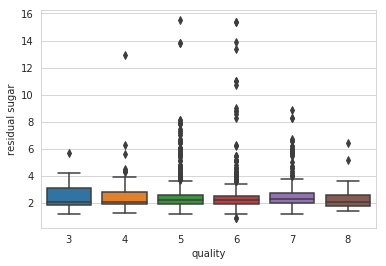

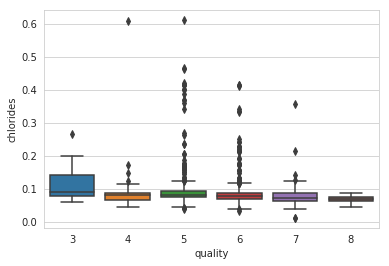

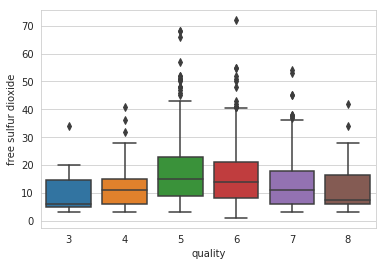

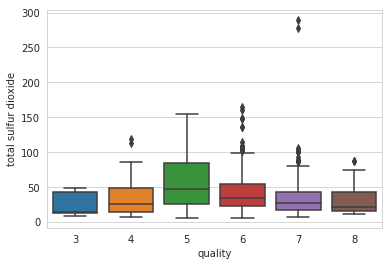

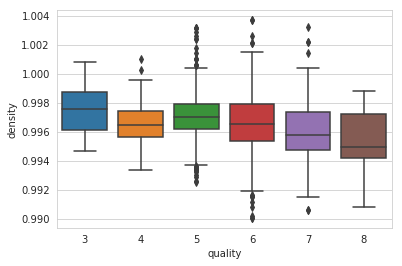

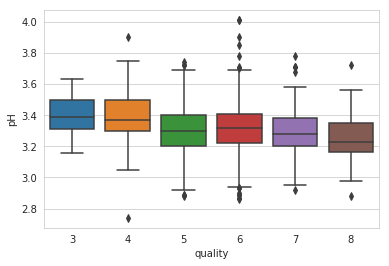

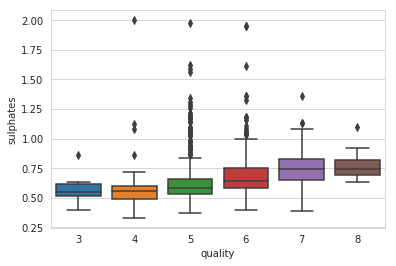

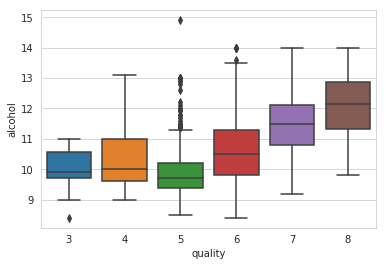

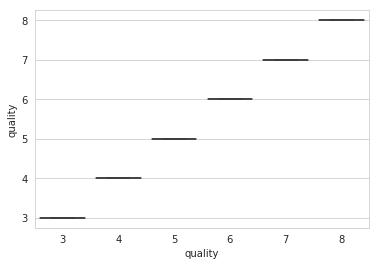

In [36]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x="quality", y=col, data=df)

Let's get rid of some of the most obvious outlier samples by clipping the dataset

In [38]:
df["fixed acidity"] = df["fixed acidity"].clip(upper=14)
df["volatile acidity"] = df["volatile acidity"].clip(upper=12)
df["citric acid"] = df["citric acid"].clip(upper=0.8)
df["residual sugar"] = df["residual sugar"].clip(upper=5)
df["chlorides"] = df["chlorides"].clip(upper=0.2)
df["free sulfur dioxide"] = df["free sulfur dioxide"].clip(upper=45)
df["total sulfur dioxide"] = df["total sulfur dioxide"].clip(upper=150)
df["density"] = df["density"].clip(upper=1.002)
df["pH"] = df["pH"].clip(upper=3.8, lower=2.9)
df["sulphates"] = df["sulphates"].clip(upper=1.12)
df["alcohol"] = df["alcohol"].clip(upper=14)

print("The dataset contains {} rows with {} features each".format(df.shape[0], df.shape[1]))
df.head()

The dataset contains 1599 rows with 12 features each


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 4 - Variation analysis

Let's use some correlation statistics to find out if there are any relations between the numerical variables

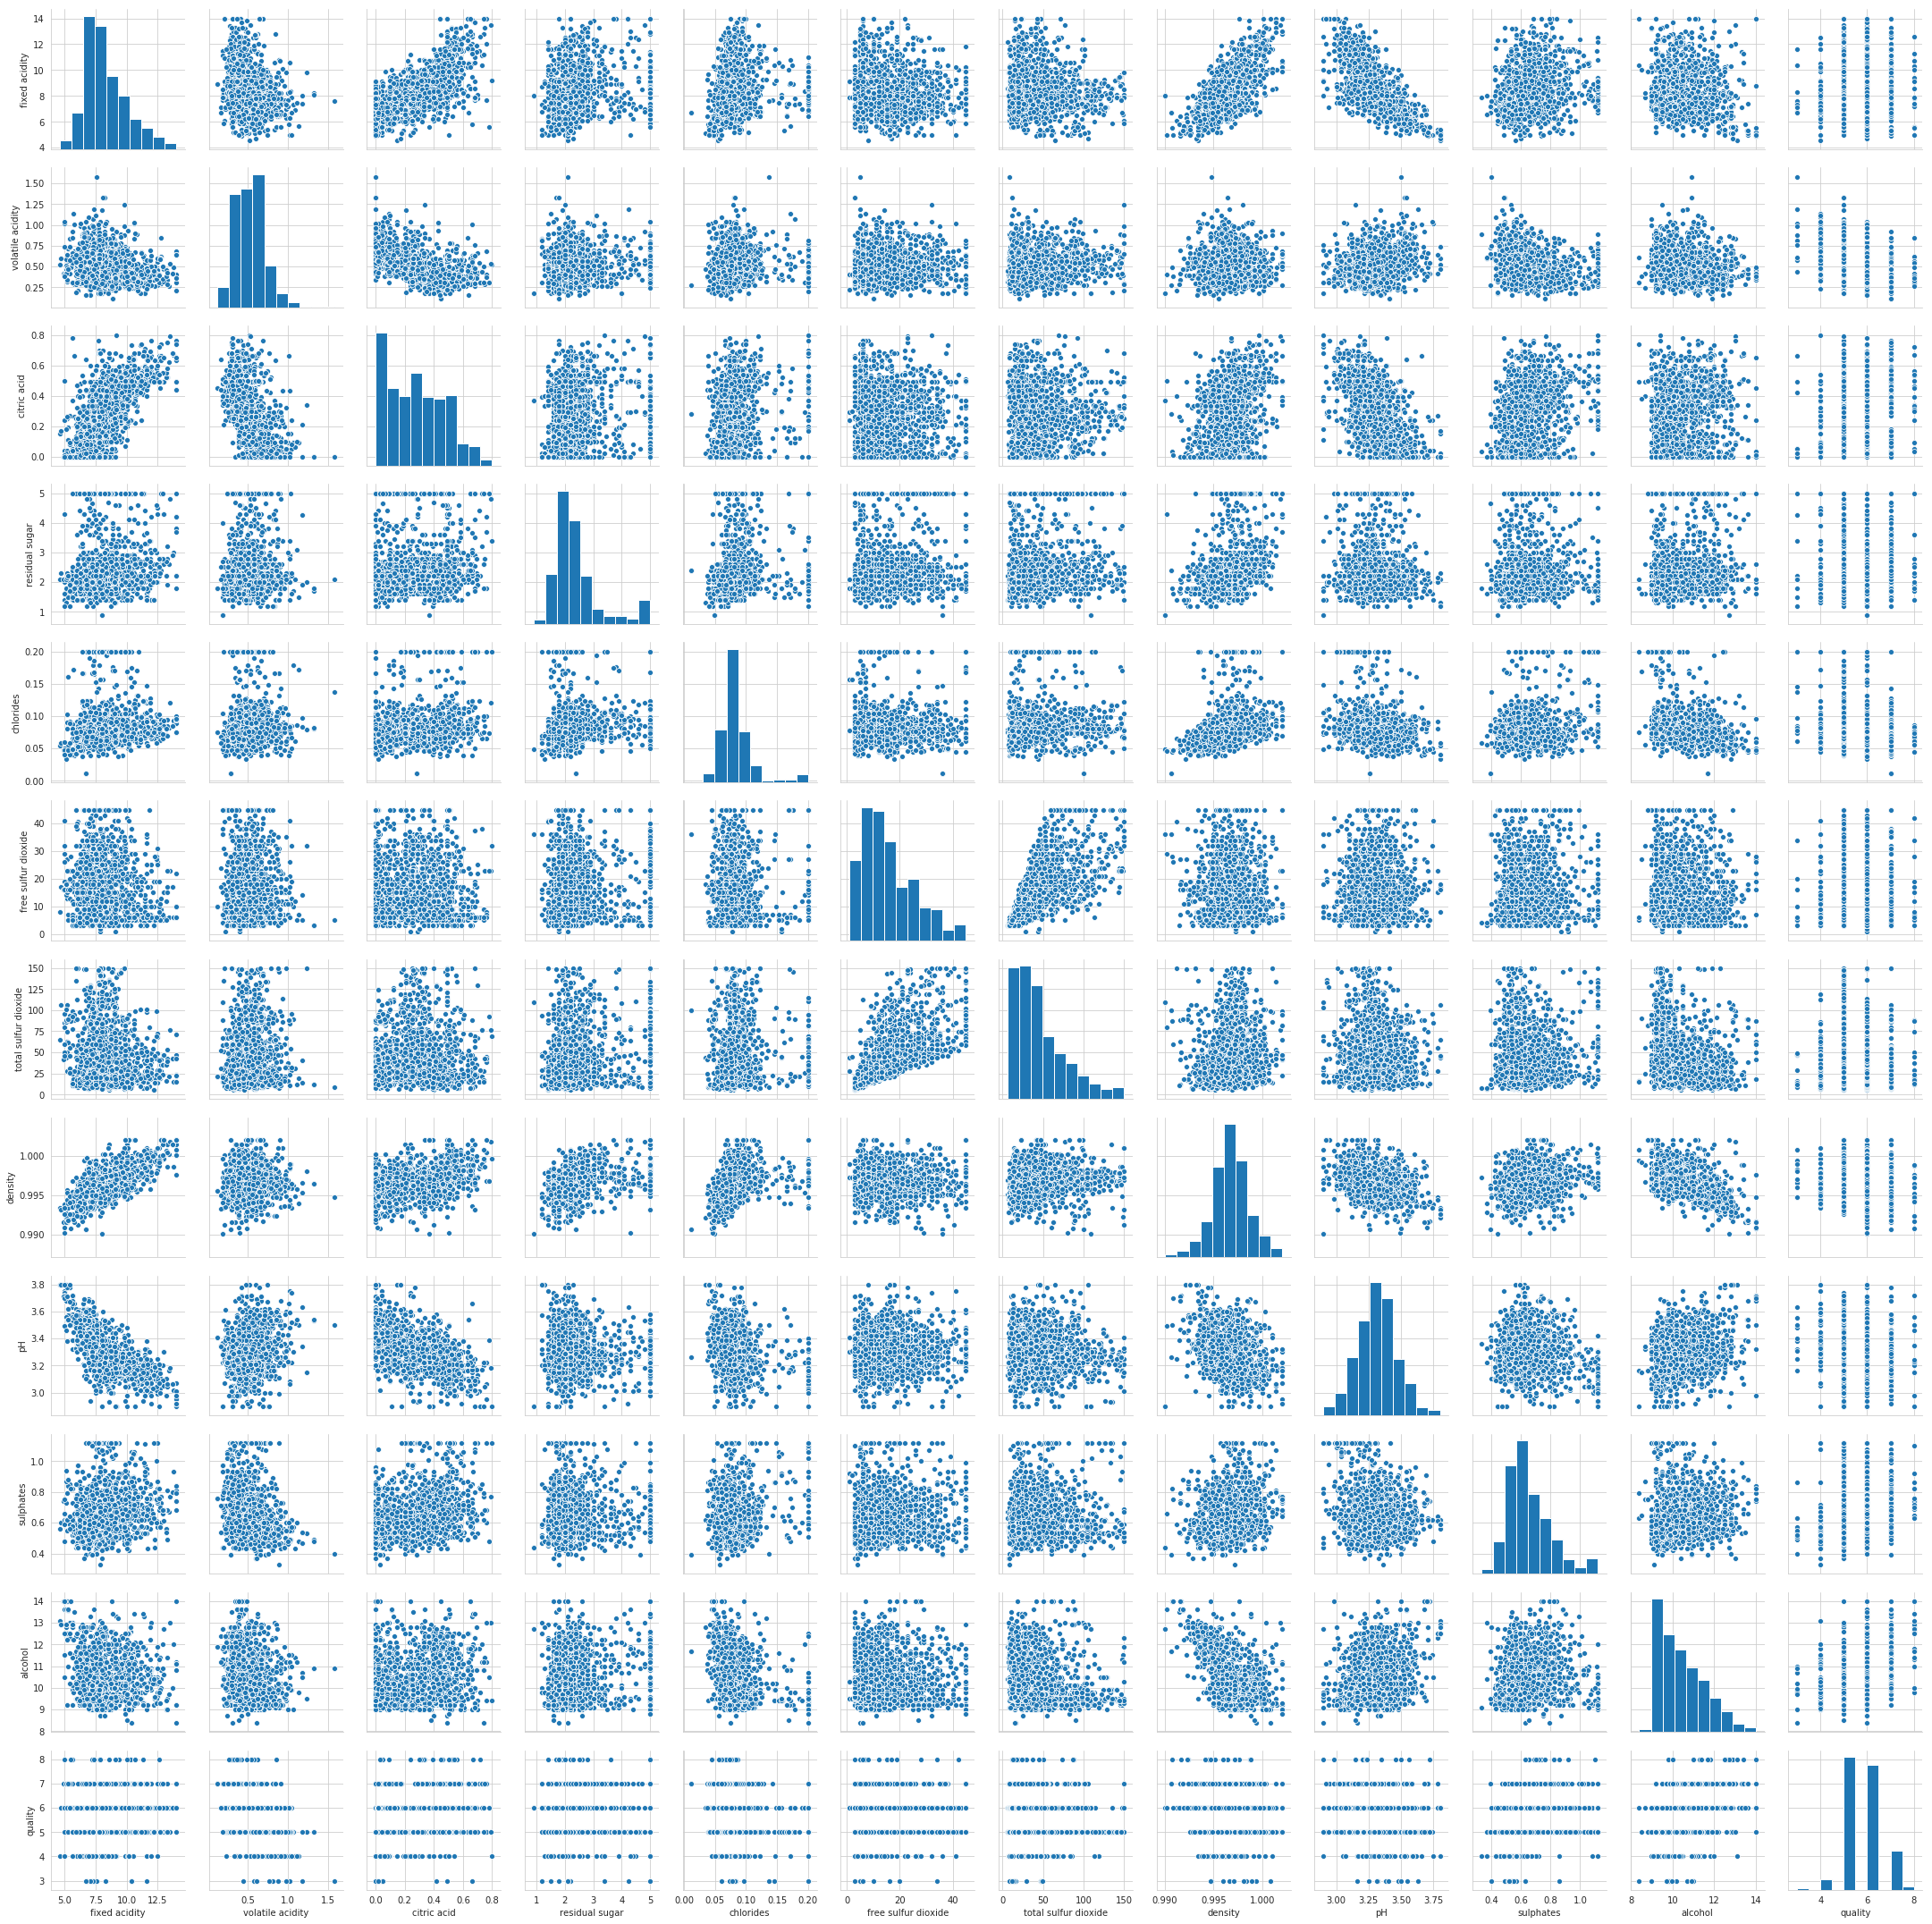

In [40]:
# Correlation graphically
sns.pairplot(df, vars=df.columns)

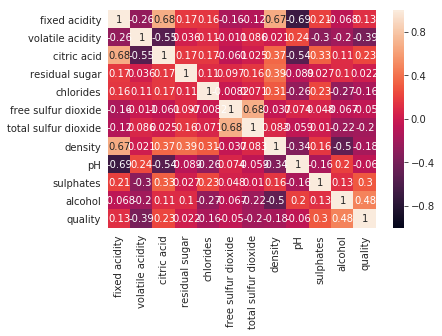

In [41]:
# Correlation statistically
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

From this, we can see that pH & the different acidices (fixed acidity, citric acid, etc) as well as the two sulfur dioxides (free & total sulfur dioxide) are correlated. From a dimensionality reduction perspective, this could be explored further if needed.

### 5 - Conclusions

The dataset contains 12 features (whereof one is the target feature) and almost 1600 examples. All the features are numerical and represent chemical test results from each batch (row) of the set.

The target class is a categorical one, ranging between 0-10 (poor - excellent) and the dataset contains data with a target between 3-8.

Pair-wise correlations suggests nonlinear relationships between the features, but as there are significat differences between the different target states a successful classification training is looking promising.